# Clase 2: Regresión Lineal y logística

In [1]:
import utils
import pickle
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

pd.set_option('display.max_columns', 50)

# Linear Regression

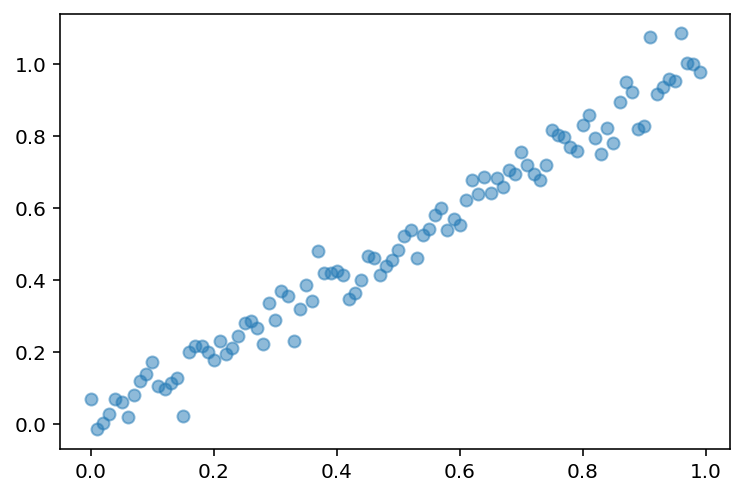

In [2]:
x = np.arange(100)/100
y = x + np.random.normal(scale=0.05, size=100)

plt.scatter(x, y, alpha=0.5);

df = pd.DataFrame()
df['x'] = x.tolist()
df['x2'] = x.tolist()
df['y'] = y.tolist()

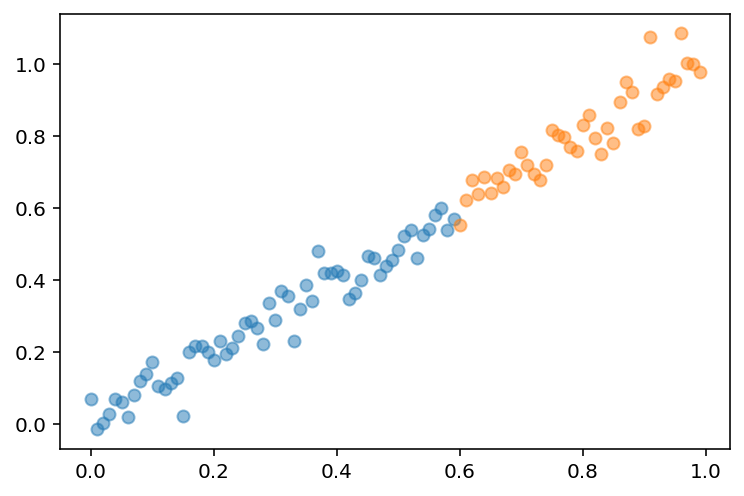

In [3]:
from sklearn.model_selection import train_test_split
#validation is orange
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.4, shuffle=False)
plt.scatter(x_train, y_train, alpha=0.5)
plt.scatter(x_val, y_val, alpha=0.5);

In [4]:
x_train = x_train[:, None]
x_val = x_val[:, None]

In [5]:
from sklearn.linear_model import LinearRegression

m = LinearRegression()
m.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [6]:
def score():
    print(f'Scores:')
    print(f'Train      = {m.score(x_train, y_train):.4}')
    print(f'Validation = {m.score(x_val, y_val):.4}')

In [7]:
score()

Scores:
Train      = 0.9402
Validation = 0.7759


In [8]:
pred_train = m.predict(x_train)
pred_val = m.predict(x_val)

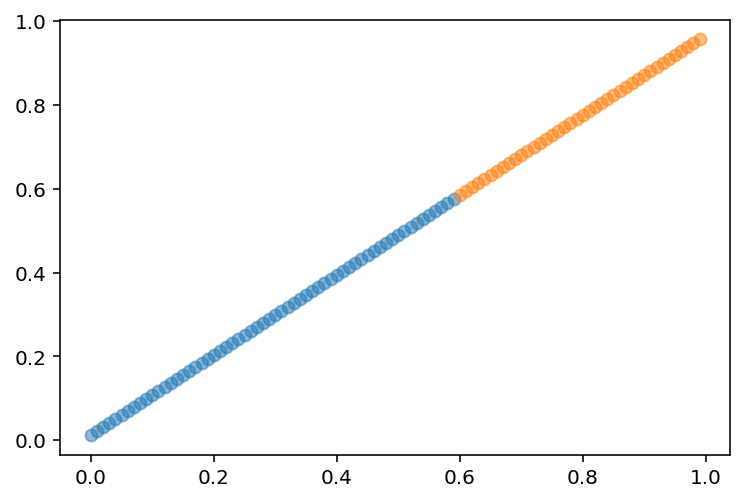

In [9]:
plt.scatter(x_train, pred_train, alpha=0.5)
plt.scatter(x_val, pred_val, alpha=0.5);

## Verificación de supuestos de la regresión lineal

In [10]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
sns.set(context="notebook", palette="Spectral", style = 'darkgrid' ,font_scale = 1.5, color_codes=True)
import warnings
warnings.filterwarnings('ignore')
import os
import matplotlib.pyplot as plt

In [11]:
ad_data = pd.read_csv('advertising.csv',index_col='Unnamed: 0')

In [12]:
ad_data.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


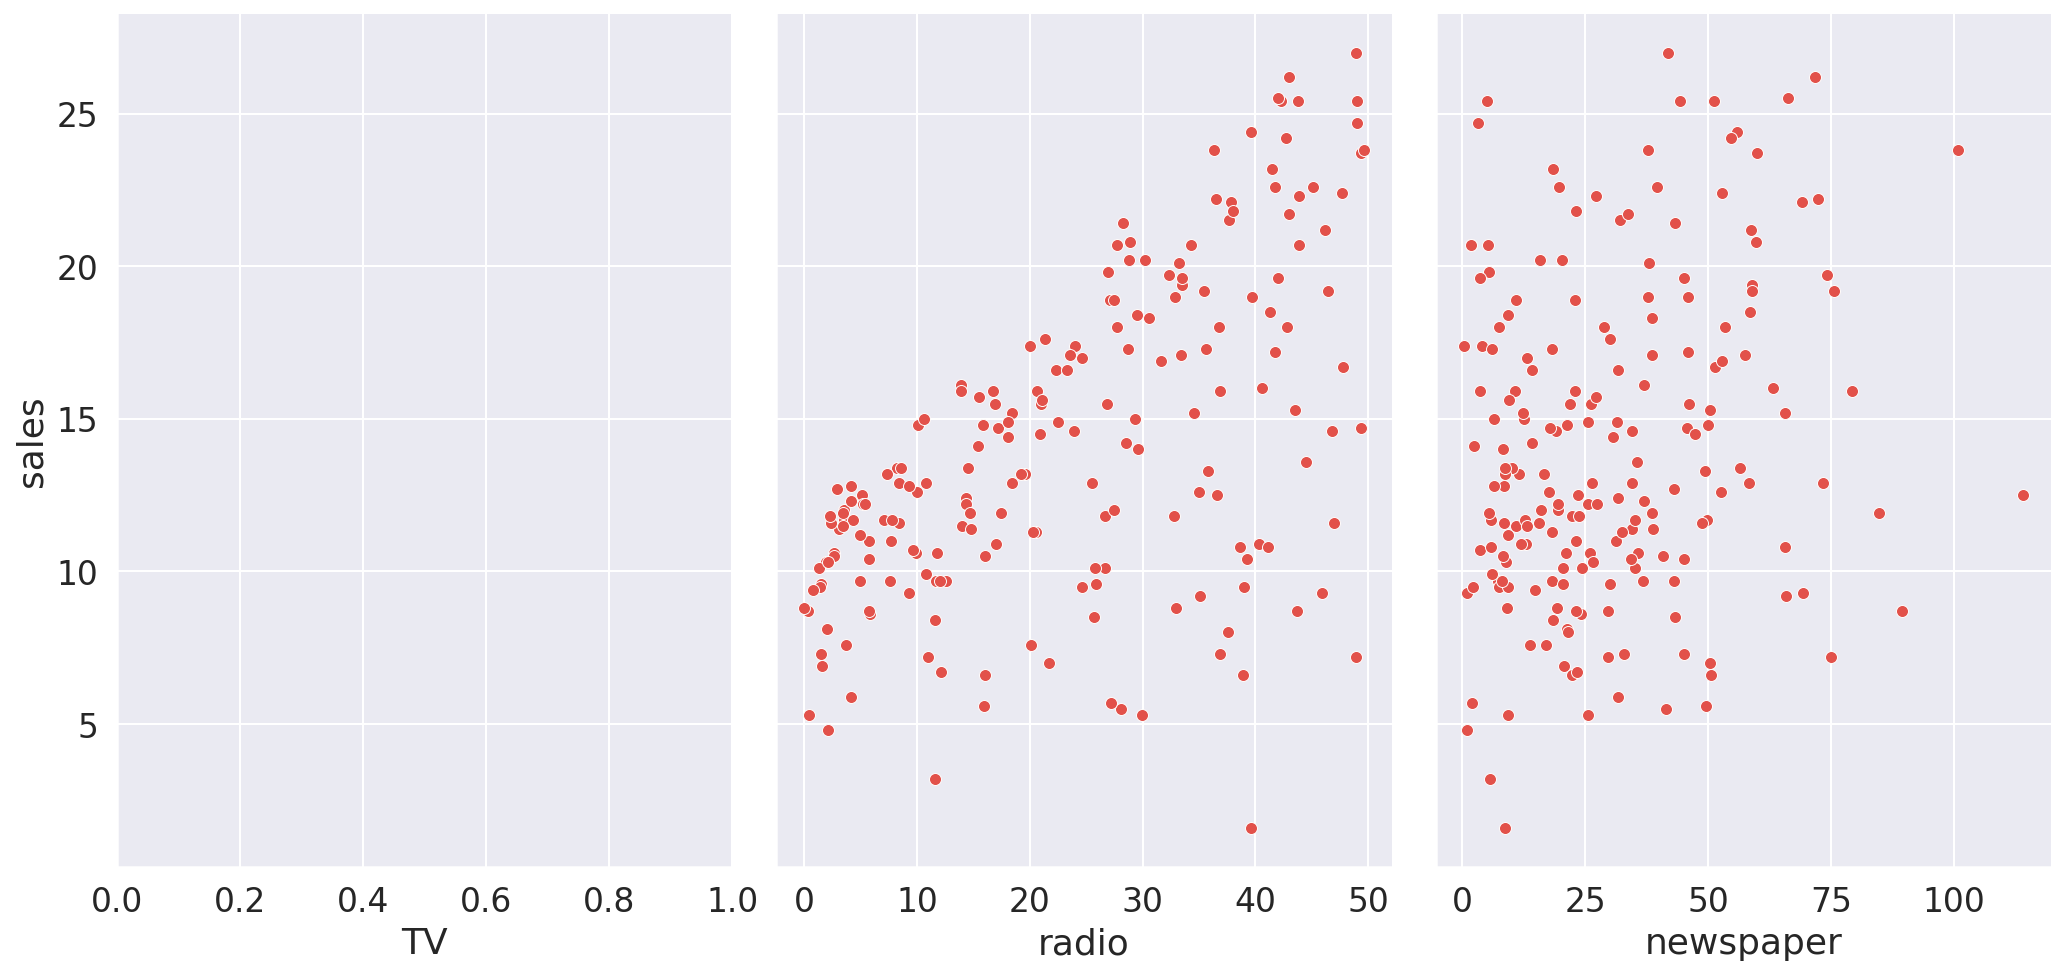

In [13]:
#Lienalidad
p = sns.pairplot(ad_data, x_vars=['TV','radio','newspaper'], y_vars='sales', size=7, aspect=0.7)

#### Se observa que ninguna de las variables tiene una tendencia lineal respecto al target claramente definida. Pero TV y radio son una aproximación. Por lo tanto, puede que los resultados de la regresión lineal no sean los mejores para este ejemplo

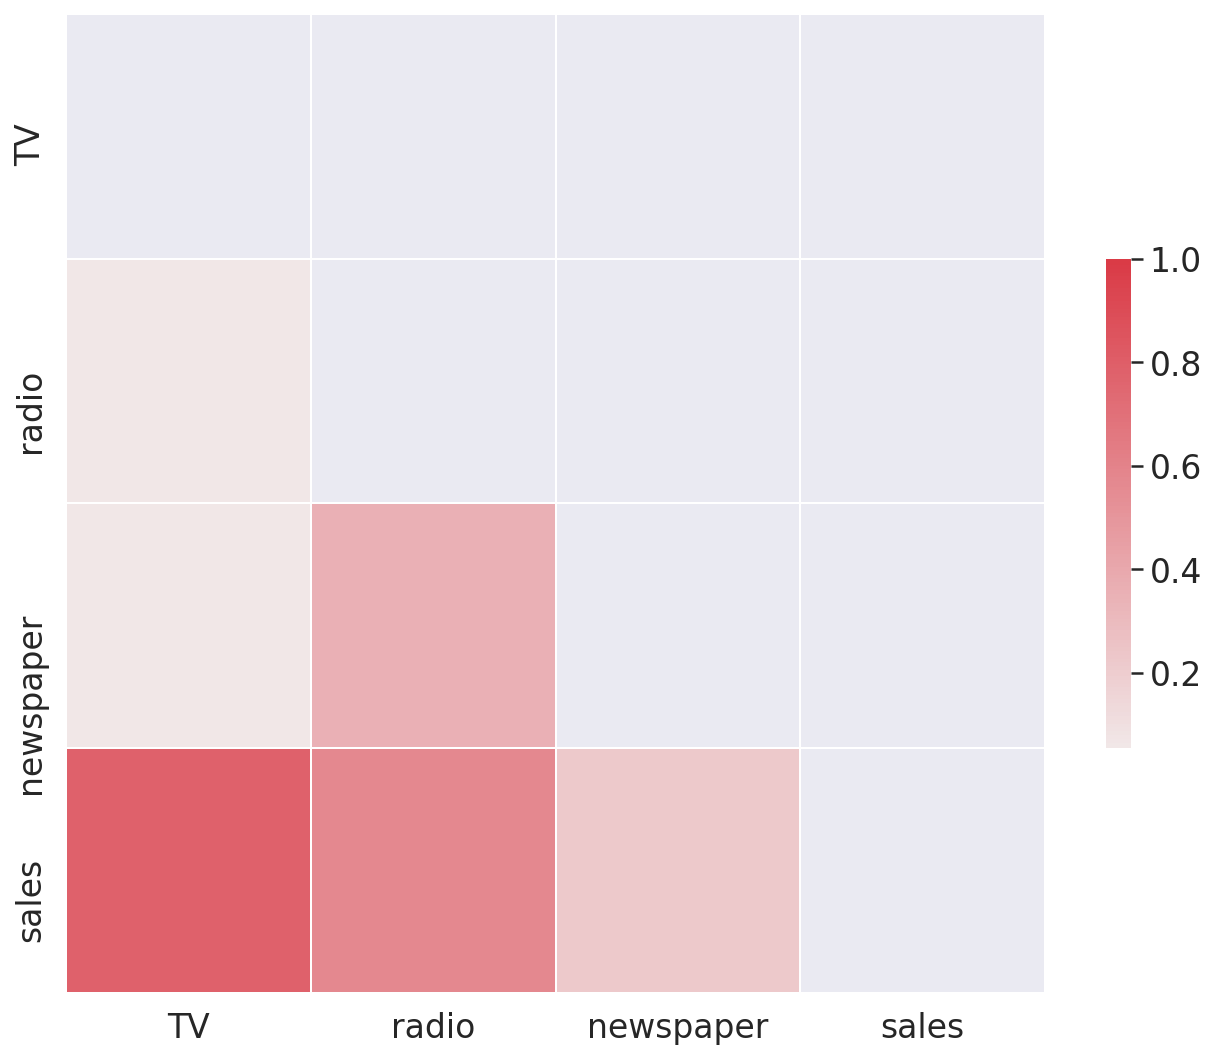

In [14]:
#Multicolinearidad
corr = ad_data.corr()

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

#### Se observa que ninguna de las variables independientes está altamente correlacionada con otra. Por lo tanto, no existe multicolinealidad. Por otro lado, se puede observar correlación entre TV y sales

In [15]:
#Entrenando la regresión lineal
x = ad_data.drop(["sales"],axis=1)
y = ad_data.sales

In [16]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(x)

In [17]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn import linear_model

regr = linear_model.LinearRegression()
regr.fit(X,y)
y_pred = regr.predict(X)

In [18]:
print("R squared: {}".format(r2_score(y_true=y,y_pred=y_pred)))

R squared: 0.8972106381789522


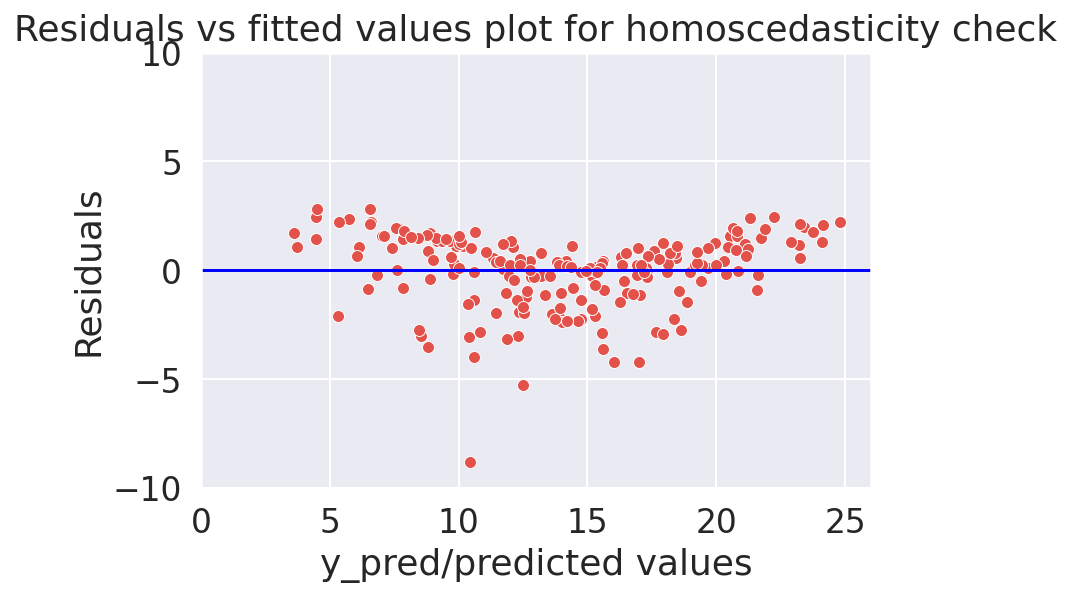

In [19]:
#Homocedasticidad: busca ver si hay un comportamiento aleatorio
#lo ideal es que sí haya, de modo que podamos cotejar que nuestras variables
#son IID
residuals = y.values-y_pred
p = sns.scatterplot(y_pred,residuals)
plt.xlabel('y_pred/predicted values')
plt.ylabel('Residuals')
plt.ylim(-10,10)
plt.xlim(0,26)
p = sns.lineplot([0,26],[0,0],color='blue')
p = plt.title('Residuals vs fitted values plot for homoscedasticity check')

#### Lo ideal es observar un comportamiento completamente aleatorio. En este caso existe cierta tendencia

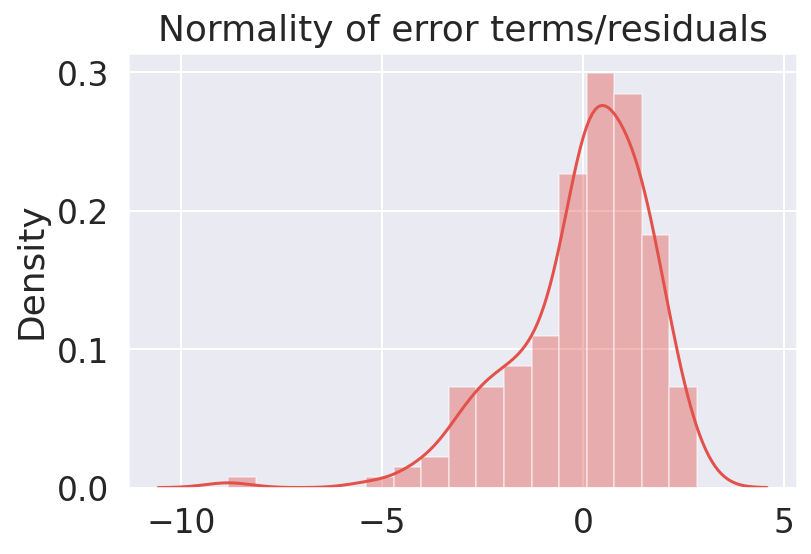

In [20]:
#Normalidad
p = sns.distplot(residuals,kde=True)
p = plt.title('Normality of error terms/residuals')

#### Aqui lo ideal es que los errores o residuos tengan un comportamiento normal. La curva podría aproximarse a una

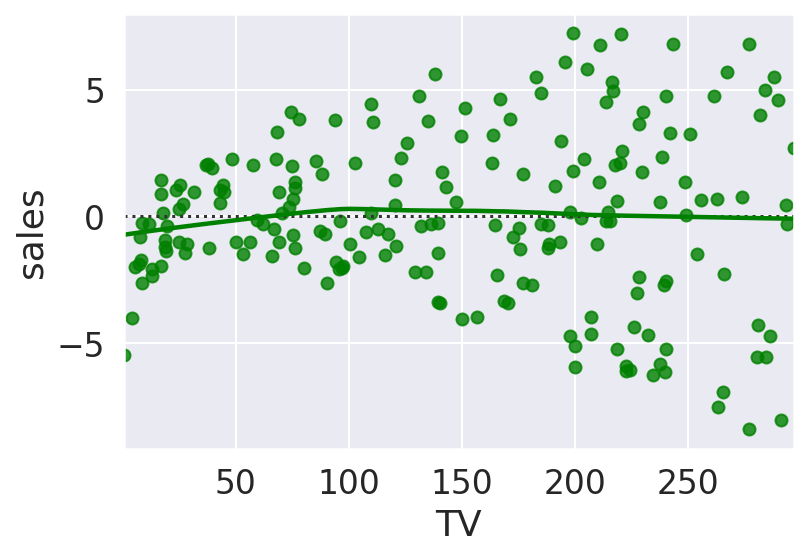

In [21]:
#Independencia: cada variable contra el target
#se busca que cada variable independiente contra la dependiente (los errores)
#sean lo más aleatorios posibles (no posean det. patrón)

sns.residplot(x['TV'], y, lowess=True, color="g")

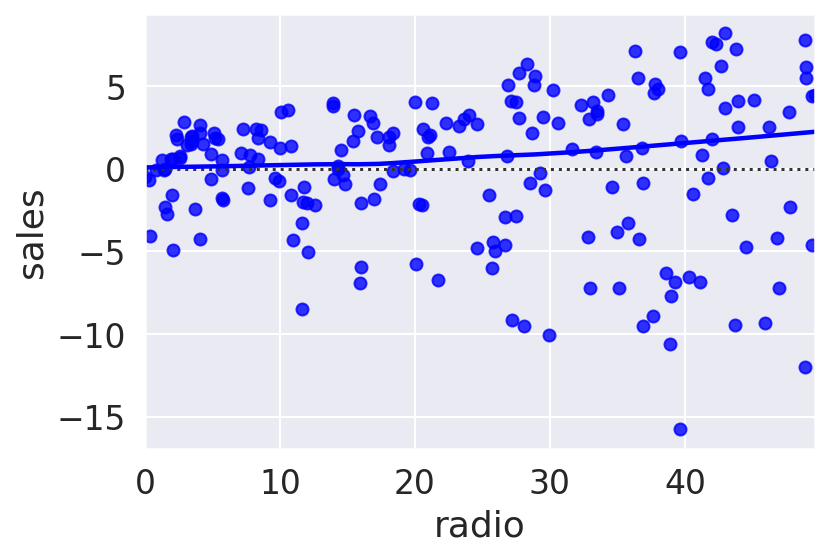

In [22]:
sns.residplot(x['radio'], y, lowess=True, color="b")

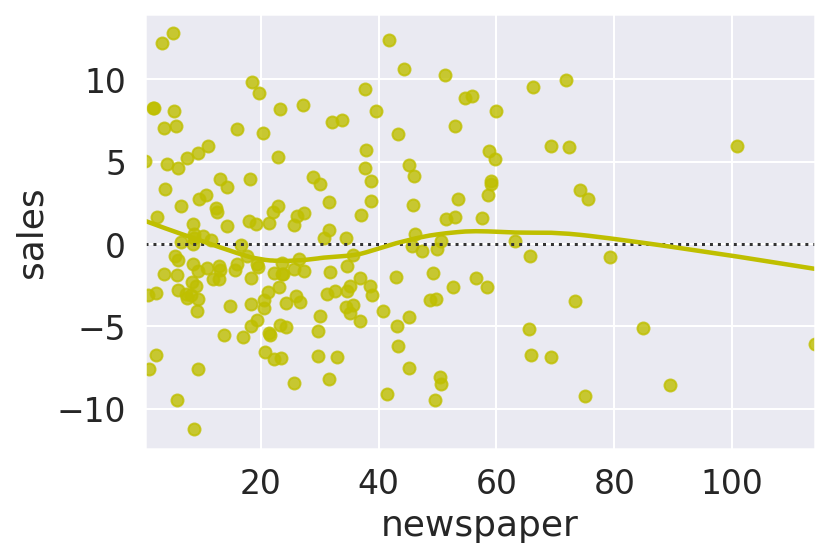

In [23]:
sns.residplot(x['newspaper'], y, lowess=True, color="y")

#### Aqui tambien lo ideal es que el comportamiento sea lo mas aleatorio posible y con centro en 0. Podemos observar que en TV y radio existe una ligera tendencia

## Revisitando House Sales Prediction Dataset

House Sales Prediction Data Set: https://www.kaggle.com/harlfoxem/housesalesprediction/home

Abstract: This dataset contains house sale prices for King County, which includes Seattle. It includes homes sold between May 2014 and May 2015.

- **id**: a notation for a house
- **date**: Date house was sold
- **price**: Price is prediction target
- **bedrooms**: Number of Bedrooms/House
- **bathrooms**: Number of bathrooms/bedrooms
- **sqft_living**: square footage of the home
- **sqft_lot**: square footage of the lot
- **floors**: Total floors (levels) in house
- **waterfront**: House which has a view to a waterfront
- **view**: Has been viewed
- **condition**: How good the condition is ( Overall )
- **grade**: overall grade given to the housing unit, based on King County grading system
- **sqft_above**: square footage of house apart from basement
- **sqft_basement**: square footage of the basement
- **yr_built**: Built Year
- **yr_renovated**: Year when house was renovated
- **zipcode**: zip
- **lat**: Latitude coordinate
- **long**: Longitude coordinate
- **sqft_living15**: Living room area in 2015(implies-- some renovations) This might or might not have affected the lotsize area
- **sqft_lot15**: lotSize area in 2015(implies-- some renovations)

In [24]:
df_raw = pd.read_csv('kc_house_data.csv', parse_dates=['date'])
print(df_raw.shape)
df_raw.head()

(21613, 21)


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


### Preprocesamiento 

In [25]:
# Borramos la variable "id"
df_raw.drop('id', axis=1, inplace=True)

# Convertimos el target a escala logarítmica
df_raw['price'] = np.log(df_raw.price)

# Obtenemos atributos a partir de la fecha
date_attr = ['Year', 'Month', 'Week', 'Day', 'Dayofweek', 'Dayofyear', 'Is_month_end',
             'Is_month_start', 'Is_quarter_end', 'Is_quarter_start', 'Is_year_end', 'Is_year_start']

for n in date_attr:
    df_raw['date_' + n] = getattr(df_raw['date'].dt, n.lower())

df_raw['date_elapsed'] = df_raw['date'].astype(np.int64) // 10 ** 9

df_raw.drop('date', axis=1, inplace=True)

# "date_Is_year_start" tiene el mismo valor para todo el dataset
df_raw.drop('date_Is_year_start', axis=1, inplace=True)

df_raw.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,date_Year,date_Month,date_Week,date_Day,date_Dayofweek,date_Dayofyear,date_Is_month_end,date_Is_month_start,date_Is_quarter_end,date_Is_quarter_start,date_Is_year_end,date_elapsed
0,12.309982,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,2014,10,42,13,0,286,False,False,False,False,False,1413158400
1,13.195614,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,2014,12,50,9,1,343,False,False,False,False,False,1418083200
2,12.100712,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062,2015,2,9,25,2,56,False,False,False,False,False,1424822400
3,13.311329,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,2014,12,50,9,1,343,False,False,False,False,False,1418083200
4,13.142166,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,2015,2,8,18,2,49,False,False,False,False,False,1424217600


### Train-validation split

In [26]:
from sklearn.model_selection import train_test_split

x = df_raw.drop('price', axis=1)
y = df_raw['price']

#x_val | usa el validation set para posteriormente sacar el feature contribution
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.2, random_state=42)
print(f'Train shape     : {x_train.shape}')
print(f'Validation shape: {x_val.shape}')

Train shape     : (17290, 30)
Validation shape: (4323, 30)


## Usando LinearRegression

In [43]:
from sklearn.linear_model import LinearRegression

m = LinearRegression()
m.fit(x_train, y_train)
score() 

Scores:
Train      = 0.7732
Validation = 0.7734


In [28]:
# Veamos el MSE
from sklearn.metrics import mean_squared_error
mean_squared_error(y_train, m.predict(x_train)), mean_squared_error(y_val, m.predict(x_val))

(0.06245665637464453, 0.06458215566242656)

In [29]:
imp = pd.DataFrame({'col':x_train.columns, #usa el coeficiente para feature importance
                    'importance':m.coef_}).sort_values(
    'importance', ascending=False)
imp.style.bar()

,col,importance
14,lat,1.404497
19,date_Month,0.713560
5,waterfront,0.376282
8,grade,0.156592
4,floors,0.075629
1,bathrooms,0.073514
7,condition,0.063468
6,view,0.061810
26,date_Is_quarter_end,0.050213
27,date_Is_quarter_start,0.023173


In [30]:
m.predict(x_val)[1979]

15.297583461143038

In [31]:
m.intercept_

-8.402333328297694

In [32]:
x_val.iloc[0]

bedrooms                          4
bathrooms                      2.25
sqft_living                    2070
sqft_lot                       8893
floors                            2
waterfront                        0
view                              0
condition                         4
grade                             8
sqft_above                     2070
sqft_basement                     0
yr_built                       1986
yr_renovated                      0
zipcode                       98058
lat                         47.4388
long                       -122.162
sqft_living15                  2390
sqft_lot15                     7700
date_Year                      2014
date_Month                       10
date_Week                        41
date_Day                          6
date_Dayofweek                    0
date_Dayofyear                  279
date_Is_month_end             False
date_Is_month_start           False
date_Is_quarter_end           False
date_Is_quarter_start       

In [33]:
x0 = pd.DataFrame(x_val.iloc[0].rename('value'))
x0['col'] = x0.index
x0 = pd.merge(x0, imp, on='col')
x0['contribution'] = x0.value * x0.importance

In [34]:
#contribucion: importancia * value
x0

,value,col,importance,contribution
0,4,bedrooms,-1.153715e-02,-0.0461486
1,2.25,bathrooms,7.351379e-02,0.165406
2,2070,sqft_living,9.708707e-05,0.20097
3,8893,sqft_lot,3.968973e-07,0.00352961
4,2,floors,7.562928e-02,0.151259
5,0,waterfront,3.762816e-01,0
6,0,view,6.181015e-02,0
7,4,condition,6.346791e-02,0.253872
8,8,grade,1.565918e-01,1.25273
9,2070,sqft_above,4.112583e-05,0.0851305


In [35]:
x0.sort_values('contribution', ascending=False).style.bar(['contribution'])

,value,col,importance,contribution
14,47.438800,lat,1.404497,66.627654
15,-122.162000,long,-0.136393,16.662030
19,10,date_Month,0.713560,7.135595
29,1412553600,date_elapsed,0.000000,3.310569
8,8,grade,0.156592,1.252735
7,4,condition,0.063468,0.253872
16,2390,sqft_living15,0.000098,0.233961
2,2070,sqft_living,0.000097,0.200970
1,2.250000,bathrooms,0.073514,0.165406
4,2.000000,floors,0.075629,0.151259


In [36]:
m.intercept_ + x0.contribution.sum()

12.963792256423108

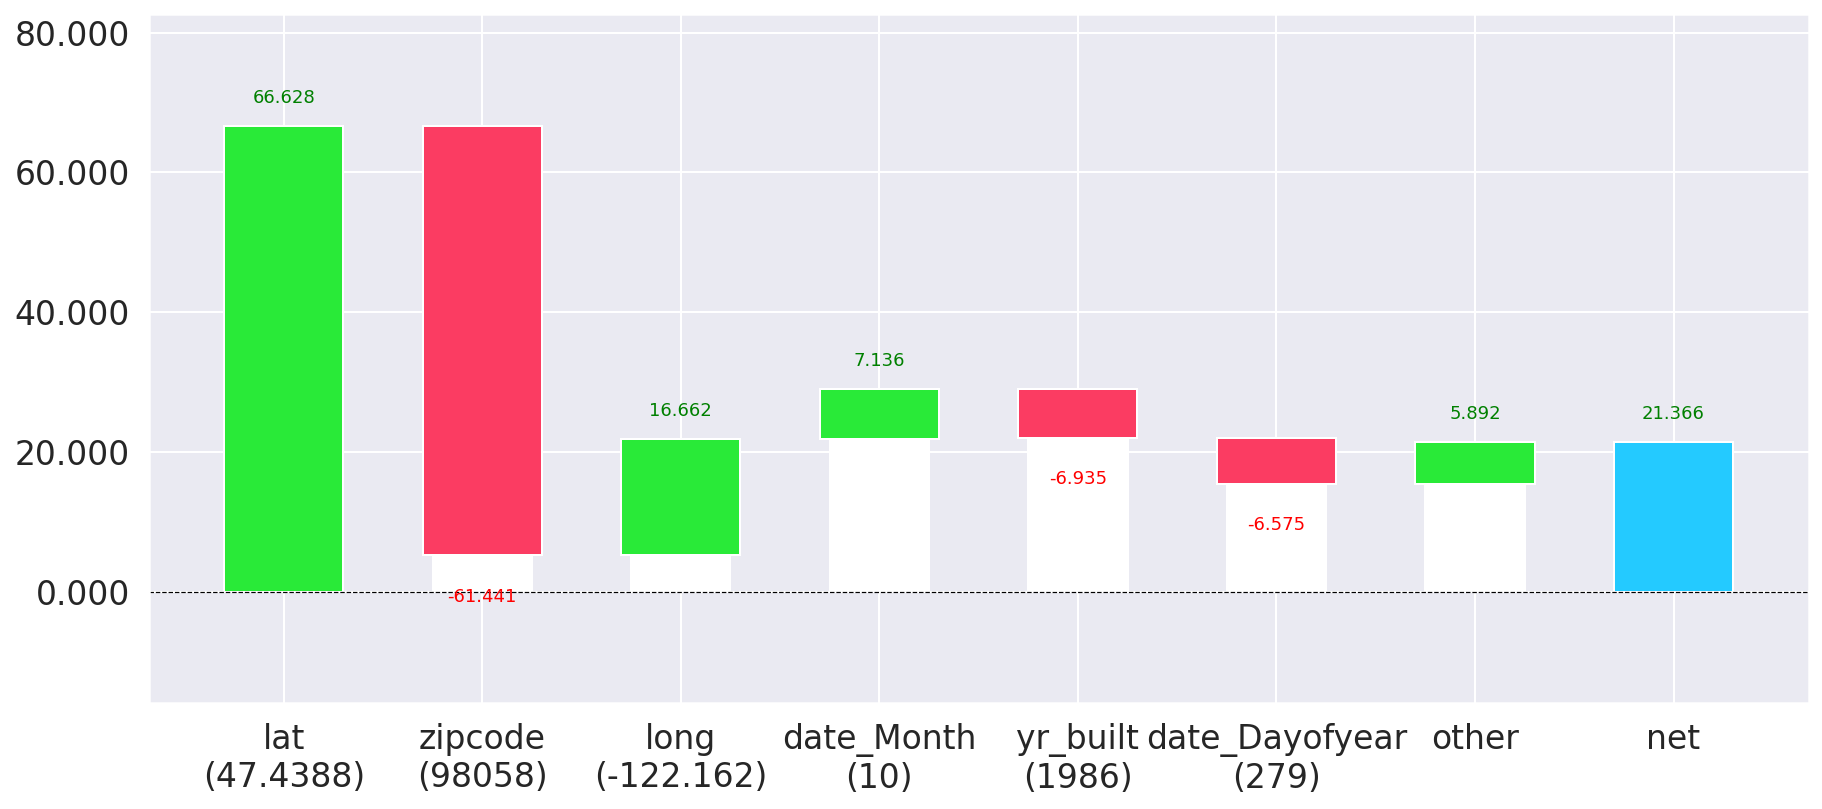

In [37]:
from utils import waterfallplot
waterfallplot(x_val.head(1), x0.contribution, 
              formatting='{:,.3f}', 
              size=(13,6), 
              sorted_value=True, 
              threshold=0.05);

## Usando SGDRegressor (Stochastic Gradient Descent Regressor) | TAREA


In [39]:
from sklearn.linear_model import SGDRegressor
from sklearn import preprocessing

scaler = preprocessing.StandardScaler()

scaled_x_train = scaler.fit_transform(x_train)
scaled_y_train = scaler.fit_transform(pd.DataFrame(y_train))
scaled_x_val = scaler.fit_transform(x_val)
scaled_y_val = scaler.fit_transform(pd.DataFrame(y_val))

**Pregunta 1: Instanciar un modelo SGDRegressor y entrenar sobre el conjunto de entrenamiento escalado. Imprimir los scores para el conjunto de entrenamiento y validación.**

In [65]:
#m = ???
m = SGDRegressor(
    max_iter = 1000,
    tol=1e-3, 
    penalty=None
    )
#m.fit(??? , ???)
m.fit(scaled_x_train, scaled_y_train)
#Imprimir Scores
#Train

print("Train:",m.score(
    scaled_x_train, 
    scaled_y_train
    )
)
#Val
print("Val:",m.score(
    scaled_x_val, 
    scaled_y_val
    )
)

Train: 0.7710439019668118
Val: 0.7716696580073669


In [66]:
# Veamos el MSE
from sklearn.metrics import mean_squared_error
mean_squared_error(scaled_y_train, m.predict(scaled_x_train)), mean_squared_error(scaled_y_val, m.predict(scaled_x_val))

(0.22895609803318817, 0.22833034199263316)

In [67]:
imp = pd.DataFrame({'col':x_train.columns, 
                    'importance':m.coef_}).sort_values(
    'importance', ascending=False)
imp.style.bar()

,col,importance
14,lat,0.361522
8,grade,0.345620
2,sqft_living,0.132340
16,sqft_living15,0.130063
9,sqft_above,0.106800
1,bathrooms,0.105520
6,view,0.092408
4,floors,0.087779
7,condition,0.079256
10,sqft_basement,0.073673


In [68]:
a=pd.DataFrame([m.predict(scaled_x_val)[1979]])
scaler.inverse_transform(a).ravel()[0]

15.286733142986337

In [69]:
x0 = pd.DataFrame(scaled_x_val[:1].T,columns=['value'])
x0['col'] = x_val.columns
x0 = pd.merge(x0, imp, on='col')
x0['contribution'] = x0.value * x0.importance

In [70]:
x0

,value,col,importance,contribution
0,0.668693,bedrooms,-0.017265,-0.011545
1,0.167697,bathrooms,0.105520,0.017695
2,-0.035280,sqft_living,0.132340,-0.004669
3,-0.147674,sqft_lot,0.038794,-0.005729
4,0.994363,floors,0.087779,0.087284
5,-0.095413,waterfront,0.066755,-0.006369
6,-0.305261,view,0.092408,-0.028208
7,0.901526,condition,0.079256,0.071451
8,0.276871,grade,0.345620,0.095692
9,0.318609,sqft_above,0.106800,0.034027


In [71]:
x0.sort_values('contribution', ascending=False).style.bar(['contribution'])

,value,col,importance,contribution
8,0.276871,grade,0.345620,0.095692
4,0.994363,floors,0.087779,0.087284
16,0.554253,sqft_living15,0.130063,0.072088
7,0.901526,condition,0.079256,0.071451
9,0.318609,sqft_above,0.106800,0.034027
13,-0.365244,zipcode,-0.048782,0.017817
1,0.167697,bathrooms,0.105520,0.017695
21,-1.136634,date_Day,-0.010128,0.011512
20,1.050485,date_Week,0.006602,0.006936
19,1.103739,date_Month,0.001500,0.001655


In [72]:
p=m.intercept_ + x0.contribution.sum()

In [73]:
scaler.inverse_transform(pd.DataFrame([p])).ravel()[0]

12.975671274636573

In [92]:
x0.contribution

0    -0.011545
1     0.017695
2    -0.004669
3    -0.005729
4     0.087284
5    -0.006369
6    -0.028208
7     0.071451
8     0.095692
9     0.034027
10   -0.049261
11   -0.105921
12   -0.008764
13    0.017817
14   -0.312293
15   -0.010005
16    0.072088
17    0.000014
18   -0.012217
19    0.001655
20    0.006936
21    0.011512
22   -0.003908
23   -0.015462
24   -0.000465
25   -0.000510
26   -0.001036
27   -0.000335
28    0.000024
29   -0.002885
Name: contribution, dtype: float64

**Pregunta 2: Mostrar la gráfica de waterfallplot sobre el conjunto de validación y la contribución de cada variable**

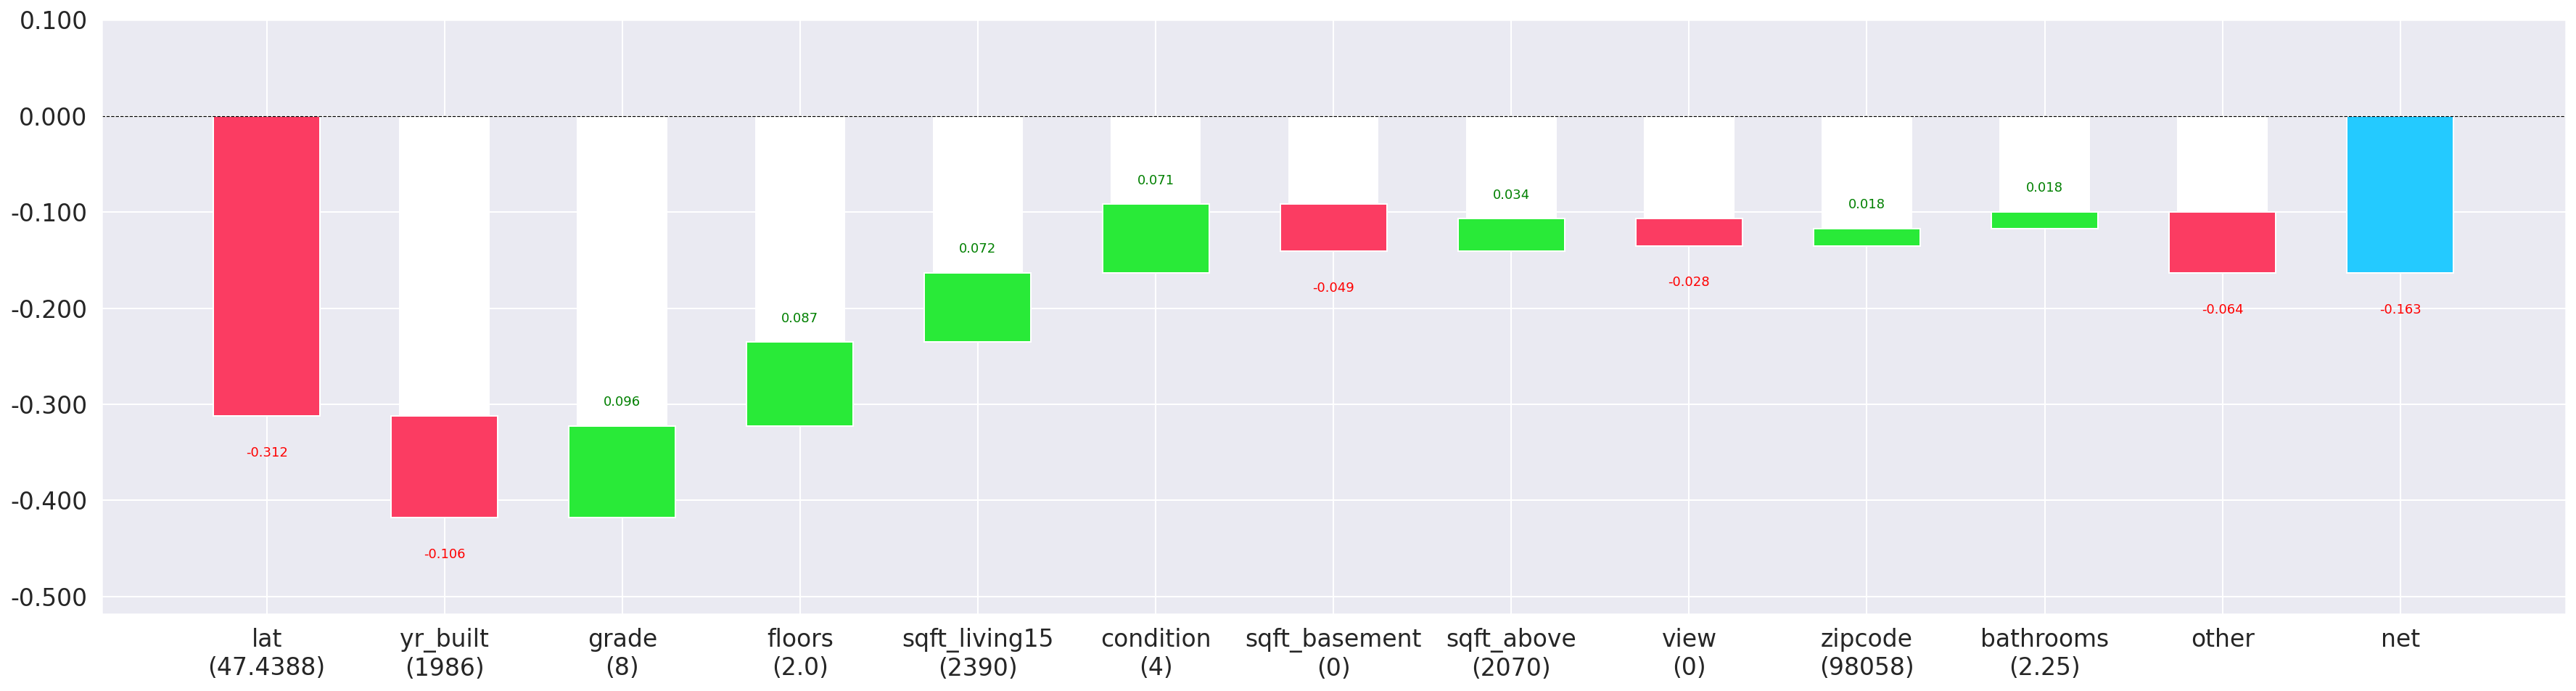

In [94]:
#x_val still belongs to scaled_x_val as a scalar transformation

waterfallplot(x_val.head(1), x0.contribution, 
              formatting='{:,.3f}', 
              size=(25,7), 
              sorted_value=True, 
              threshold=0.05);

# Logistic Regression

## Revisitando Census Income Dataset

Census Income Data Set: http://mlr.cs.umass.edu/ml/datasets/Census+Income

Abstract: Predict whether income exceeds $50K/yr based on census data. Also known as "Adult" dataset.

* **age:** continuous.
* **workclass:** Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
* **fnlwgt:** continuous.
* **education:** Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
* **education-num:** continuous.
* **marital-status:** Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
* **occupation:** Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
* **relationship:** Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
* **race:** White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
* **sex:** Female, Male.
* **capital-gain:** continuous.
* **capital-loss:** continuous.
* **hours-per-week:** continuous.
* **native-country:** United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.

In [95]:
df_raw = pd.read_csv('census_train.csv') #pd.read_csv('data/census_train.csv')
df_test = pd.read_csv('census_test.csv') #pd.read_csv('data/census_test.csv')
print(df_raw.shape, df_test.shape)
df_raw.head(3)

(32561, 15) (16281, 15)


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,label
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K


### Preprocesamiento 


In [96]:
df_raw = df_raw.drop('education', axis=1) \
                .rename({'education-num': 'education'}, axis=1)

for n, col in df_raw.items():
    if not pd.api.types.is_numeric_dtype(col) and n != 'label':
        # Transforma la variable a tipo category
        df_raw[n] = col.astype('category')
        
df = df_raw.copy()

# Convertir cada columna categórica a numérica
for n,col in df.items():
    if pd.api.types.is_categorical_dtype(col):
        df[n] = col.cat.codes+1
        
df.head()

,age,workclass,fnlwgt,education,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,label
0,39,8,77516,13,5,2,2,5,2,2174,0,40,40,<=50K
1,50,7,83311,13,3,5,1,5,2,0,0,13,40,<=50K
2,38,5,215646,9,1,7,2,5,2,0,0,40,40,<=50K
3,53,5,234721,7,3,7,1,3,2,0,0,40,40,<=50K
4,28,5,338409,13,3,11,6,3,1,0,0,40,6,<=50K


### Probando el modelo (holdout validation)

In [97]:
from sklearn.model_selection import train_test_split

x = df.drop('label', axis=1)
y = df['label']

x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.2, random_state=42)
print(f'Train shape     : {x_train.shape}')
print(f'Validation shape: {x_val.shape}')

Train shape     : (26048, 13)
Validation shape: (6513, 13)


In [98]:
from sklearn.linear_model import LogisticRegression

m = LogisticRegression(penalty='l2',solver='liblinear') #el solver también puede ser el "gradientdescent"
m.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [99]:
score() # se definio usando 'm' anterior de la reg lineal 
#este es el score anterior de reg lineal!!!!

Scores:
Train      = 0.7927
Validation = 0.7933


**Pregunta 3: Probar entrenando una Regresión Logística con otro regularizador. Imprimir el score.**

In [109]:
#Código | #EllasticNet regularization using SAGA | Main paramters where r = 0.5
m = LogisticRegression(penalty='elasticnet', solver='saga', l1_ratio=0.5)
m.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=0.5, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='elasticnet',
                   random_state=None, solver='saga', tol=0.0001, verbose=0,
                   warm_start=False)

In [110]:
score()

Scores:
Train      = 0.7934
Validation = 0.7943


### Probando el modelo (**_cross validation_**)


In [111]:
from sklearn.model_selection import KFold
kfolds = KFold(n_splits=5, shuffle=True, random_state=42)

In [112]:
x = df.drop('label', axis=1)
y = df['label']

train_scores, val_scores = [], []

for train_idx, val_idx in kfolds.split(x):
    x_train, y_train = x.iloc[train_idx], y.iloc[train_idx]
    x_val, y_val = x.iloc[val_idx], y.iloc[val_idx]
    m = LogisticRegression(penalty='l2',solver='liblinear')
    m.fit(x_train, y_train)
    score()
    print()
    train_scores.append(m.score(x_train, y_train))
    val_scores.append(m.score(x_val, y_val))

print('=========================')
print(f'Average Scores:')
print(f'Train      = {np.mean(train_scores):.4}')
print(f'Validation = {np.mean(val_scores):.4}')

Scores:
Train      = 0.7921
Validation = 0.7933

Scores:
Train      = 0.803
Validation = 0.8073

Scores:
Train      = 0.802
Validation = 0.7985

Scores:
Train      = 0.8072
Validation = 0.8028

Scores:
Train      = 0.7937
Validation = 0.7979

Average Scores:
Train      = 0.7996
Validation = 0.8


### Variables categóricas: One-hot encoding (obtener dummies)


In [113]:
df_raw.head()

,age,workclass,fnlwgt,education,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,label
0,39,State-gov,77516,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [114]:
x = df_raw.drop('label', axis=1)
y = df_raw['label']

x = pd.get_dummies(x, drop_first=True)
x.shape

(32561, 85)

In [115]:
x.head()

,age,fnlwgt,education,capital-gain,capital-loss,hours-per-week,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov,workclass_ Without-pay,marital-status_ Married-AF-spouse,marital-status_ Married-civ-spouse,marital-status_ Married-spouse-absent,marital-status_ Never-married,marital-status_ Separated,marital-status_ Widowed,occupation_ Adm-clerical,occupation_ Armed-Forces,occupation_ Craft-repair,occupation_ Exec-managerial,occupation_ Farming-fishing,...,native-country_ Hong,native-country_ Hungary,native-country_ India,native-country_ Iran,native-country_ Ireland,native-country_ Italy,native-country_ Jamaica,native-country_ Japan,native-country_ Laos,native-country_ Mexico,native-country_ Nicaragua,native-country_ Outlying-US(Guam-USVI-etc),native-country_ Peru,native-country_ Philippines,native-country_ Poland,native-country_ Portugal,native-country_ Puerto-Rico,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia
0,39,77516,13,2174,0,40,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,50,83311,13,0,0,13,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,38,215646,9,0,0,40,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,53,234721,7,0,0,40,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,28,338409,13,0,0,40,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


### Variables continuas: Normalización

In [116]:
df_raw['workclass'].dtypes

CategoricalDtype(categories=[' ?', ' Federal-gov', ' Local-gov', ' Never-worked',
                  ' Private', ' Self-emp-inc', ' Self-emp-not-inc',
                  ' State-gov', ' Without-pay'],
                 ordered=False)

In [117]:
cont_cols = [col for col in df_raw if \
             pd.api.types.is_numeric_dtype(df_raw[col])]

In [118]:
cont_cols

['age',
 'fnlwgt',
 'education',
 'capital-gain',
 'capital-loss',
 'hours-per-week']

In [119]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_x = scaler.fit_transform(x[cont_cols])

In [120]:
for col, scaled_data in zip(cont_cols, scaled_x.T):
    x[col] = scaled_data

In [121]:
x.head()

,age,fnlwgt,education,capital-gain,capital-loss,hours-per-week,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov,workclass_ Without-pay,marital-status_ Married-AF-spouse,marital-status_ Married-civ-spouse,marital-status_ Married-spouse-absent,marital-status_ Never-married,marital-status_ Separated,marital-status_ Widowed,occupation_ Adm-clerical,occupation_ Armed-Forces,occupation_ Craft-repair,occupation_ Exec-managerial,occupation_ Farming-fishing,...,native-country_ Hong,native-country_ Hungary,native-country_ India,native-country_ Iran,native-country_ Ireland,native-country_ Italy,native-country_ Jamaica,native-country_ Japan,native-country_ Laos,native-country_ Mexico,native-country_ Nicaragua,native-country_ Outlying-US(Guam-USVI-etc),native-country_ Peru,native-country_ Philippines,native-country_ Poland,native-country_ Portugal,native-country_ Puerto-Rico,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia
0,0.030671,-1.063611,1.134739,0.148453,-0.21666,-0.035429,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,0.837109,-1.008707,1.134739,-0.145920,-0.21666,-2.222153,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,-0.042642,0.245079,-0.420060,-0.145920,-0.21666,-0.035429,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,1.057047,0.425801,-1.197459,-0.145920,-0.21666,-0.035429,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,-0.775768,1.408176,1.134739,-0.145920,-0.21666,-0.035429,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [122]:
train_scores, val_scores = [], []

for train_idx, val_idx in kfolds.split(x):
    x_train, y_train = x.iloc[train_idx], y.iloc[train_idx]
    x_val, y_val = x.iloc[val_idx], y.iloc[val_idx]
    m = LogisticRegression(penalty='l2',solver='liblinear')
    m.fit(x_train, y_train)
    score()
    print()
    train_scores.append(m.score(x_train, y_train))
    val_scores.append(m.score(x_val, y_val))

print('=========================')
print(f'Average Scores:')
print(f'Train      = {np.mean(train_scores):.4}')
print(f'Validation = {np.mean(val_scores):.4}')

Scores:
Train      = 0.8522
Validation = 0.8581

Scores:
Train      = 0.8539
Validation = 0.8503

Scores:
Train      = 0.8532
Validation = 0.8506

Scores:
Train      = 0.8526
Validation = 0.852

Scores:
Train      = 0.8531
Validation = 0.8497

Average Scores:
Train      = 0.853
Validation = 0.8521


**Preguntar 4: Experimentar con una Regresión Logística usando SAGA (Stochastic Average Gradient Descend). Imprimir los scores** 

In [123]:
#Código 
#Saga was defined previously using an ELASTIC NET regularization
#Here, we will compute the same model parameters

train_scores, val_scores = [], []

for train_idx, val_idx in kfolds.split(x):
    x_train, y_train = x.iloc[train_idx], y.iloc[train_idx]
    x_val, y_val = x.iloc[val_idx], y.iloc[val_idx]
    m = LogisticRegression(
        penalty='elasticnet', 
        solver='saga', 
        l1_ratio=0.5
        )
    m.fit(x_train, y_train)
    score()
    print()
    train_scores.append(m.score(x_train, y_train))
    val_scores.append(m.score(x_val, y_val))

print('=========================')
print(f'Average Scores:')
print(f'Train      = {np.mean(train_scores):.4}')
print(f'Validation = {np.mean(val_scores):.4}')

Scores:
Train      = 0.8522
Validation = 0.8589

Scores:
Train      = 0.8537
Validation = 0.85

Scores:
Train      = 0.8534
Validation = 0.8507

Scores:
Train      = 0.8525
Validation = 0.8523

Scores:
Train      = 0.8533
Validation = 0.8503

Average Scores:
Train      = 0.853
Validation = 0.8524


Conclusions: 

We've used a SAGA Logistic Regressor model with an Elastic Net as a regularizator. This combination bring us an equivalent performance during the Kfold CV (see the final _Average Scores_). This is interesting. Probably, this happens mainly due to the fact we are using a **r = 0.5** —that's, not too close to an r=1 ('l1' or Lasso Regressor) and no too close to an r=0 ('l2' or Ridge Regressor) as well. This perhaps bring us an equivalent model structure relative to the first predefined Logistic Regression model. 
